说明:
RFECV比RFE多了一个交叉验证的分数(gridscores)，代表选择多少特征后的准确率。但RFECV不需要指定选定多少特征，而是根据对比的分数来自动选择训练的特征数。

In [1]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

In [2]:
X,y = make_classification(n_samples=1000, n_features=25, n_informative=3,
                         n_redundant=2, n_repeated =0, n_classes=8,
                         n_clusters_per_class=1, random_state=0)

In [3]:
svc = SVC(kernel='linear')

In [4]:
rfecv = RFECV(estimator=svc, step =1, cv = StratifiedKFold(y,2), scoring = 'accuracy')
rfecv.fit(X,y)

RFECV(cv=sklearn.cross_validation.StratifiedKFold(labels=[1 3 ..., 7 1], n_folds=2, shuffle=False, random_state=None),
   estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

In [5]:
#返回最佳特征数
print('Optimal number of features : %d' % rfecv.n_features_)

Optimal number of features : 3


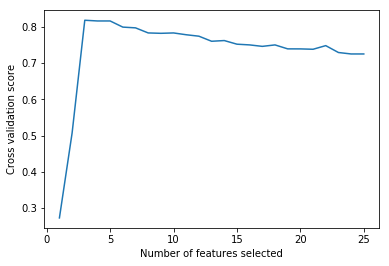

In [6]:
#plot score变化情况
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.show()